Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

Single-Scatter Recoil Spectrum
===============================

In the paper we have computed the differential cross section for a neutron magnetically scattering off of a single electron. That expression is as follows. 

\begin{equation}
\left ( \frac{d\sigma}{d\Omega} \right )_{CM}= \frac{2m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2}.
\end{equation}

This cross section is easily converted into the single-scatter recoil cross section for monoenergetic neutrons by the same methods as the notebook `0-Preliminaries/B-Neutron-Nucleus-Recoil-Distributions.ipynb`.

\begin{equation}
\begin{aligned}
\frac{d\sigma}{dE_r} &= \int d\phi_{cm} \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right)\\
&=2\pi \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right),
\end{aligned}
\end{equation}

This results in the following differential cross section:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{2\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{(m_n+m_e)^2}{m_n m_e E_n}.
\end{equation}

This can also be written in terms of the maximum recoil for a given neutron energy $E_n$. That results in:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{8\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{1}{E_{\mathrm{max}}(E_n)}.
\end{equation}

Compute the Cross Section
-------------------------

Below we compute this function $d\sigma/dE_r$. It is a uniform distribution at some level up to the maximum recoil energy. This follows from the fact that the angular cross section in the CoM is angle-independent. 

In [2]:
import scipy.constants as co
m_n = co.physical_constants['neutron mass energy equivalent in MeV'][0]*1e3 # neutron mass in keV
m_e = co.physical_constants['electron mass energy equivalent in MeV'][0]*1e3

print("Neutron Mass: {} keV".format(m_n))
print("Electron Mass: {} keV".format(m_e))

Neutron Mass: 939565.4205199999 keV
Electron Mass: 510.99895 keV


In [3]:
def Emax(En): #En in keV; returns maximum recoil energy for neutron energy
    return (4*m_e*m_n*En)/(m_e+m_n)**2

def Enmin(Er): #recoil energy in keV; returns minimum neutron energy to give that recoil energy
    return (Er*(m_e+m_n)**2)/(4*m_e*m_n)

In [4]:
#constants for calcs, first in SI units
gn = co.physical_constants['neutron gyromag. ratio'][0] #default is s^-1 T^-1; CGS is s^-1 Gauss^-1
mub = co.physical_constants['Bohr magneton'][0] #default is J T^-1
hbar = co.physical_constants['reduced Planck constant'][0] #default in J s

#convert to CGS
#see https://en.wikipedia.org/wiki/Centimetre%E2%80%93gram%E2%80%93second_system_of_units
m_n_CGS = co.physical_constants['neutron mass'][0]*1e3 #convert to grams
gn_CGS = gn/1e4
mub_CGS = mub*1e3
hbar_CGS = hbar*1e7

barnincm2 = 1e-24

print('Neutron mass: {} g'.format(m_n_CGS))
print('Neutron gyromagnetic ratio: {} s^-1 Gauss^-1 '.format(gn_CGS))
print('Bohr magneton: {} erg Gauss^-1 '.format(mub_CGS))
print('hbar: {} erg s '.format(hbar_CGS))


Neutron mass: 1.67492749804e-24 g
Neutron gyromagnetic ratio: 18324.7171 s^-1 Gauss^-1 
Bohr magneton: 9.2740100783e-21 erg Gauss^-1 
hbar: 1.054571817e-27 erg s 


In [5]:
sigtot = 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2
print('Total cross section: {} barns'.format(sigtot/barnincm2))

Total cross section: 1.8310038087245937 barns


In [6]:
def dsigdEr(En,Er):
    if(Er<Emax(En)):
      return 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2/Emax(En)
    else: 
      return 0

In [8]:
print(dsigdEr(1000,1)/barnincm2) #1 MeV neutron at 1 keV recoil

0.8425749477714446


In [9]:
print(dsigdEr(1000,3)/barnincm2) #1 MeV neutron at 3 keV recoil

0.0


Integrating Against Flux Spectrum
---------------------------------

To get the observed recoil spectrum, we have to take into account all of the incident neutron energies and their relative rates. To do this we can use the differential flux $\phi(E_n)$ from the function `SNOLAB_flux` in the library `flux_recoil_spec.py`. The expression that will give the recoil spectrum is as follows.

\begin{equation}
R = \frac{\eta N_A}{m} \int dE_n \phi(E_n)\frac{d\sigma}{dE_r}
\end{equation}

$R$ stands for rate in units of events/kg/day/keV. $\eta$ is the number of electrons that are available-to-scatter per atom, $N_A$ is Avogadro's number, and $m$ is the molar mass of the detector material. 

In [10]:
import flux_recoil_spec as frs
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01


In [20]:
import importlib
importlib.reload(frs)

print(frs.Emax(1000))
print(frs.Enmin(2.1731049))
print(frs.dsigdErNE(1000,1)/barnincm2)

2.1731049725220037
999.9999666274732
0.8425749477714446


In [22]:
dsder = lambda x: frs.dsigdErNE(1000,x)
dsderv = np.vectorize(dsder)
print(dsderv([1,2]))

[8.42574948e-25 8.42574948e-25]


In [23]:
Er= np.geomspace(0.1, 10.0, 100)
drde,dsig=frs.dRdErNE(Er,E,F,N=1)

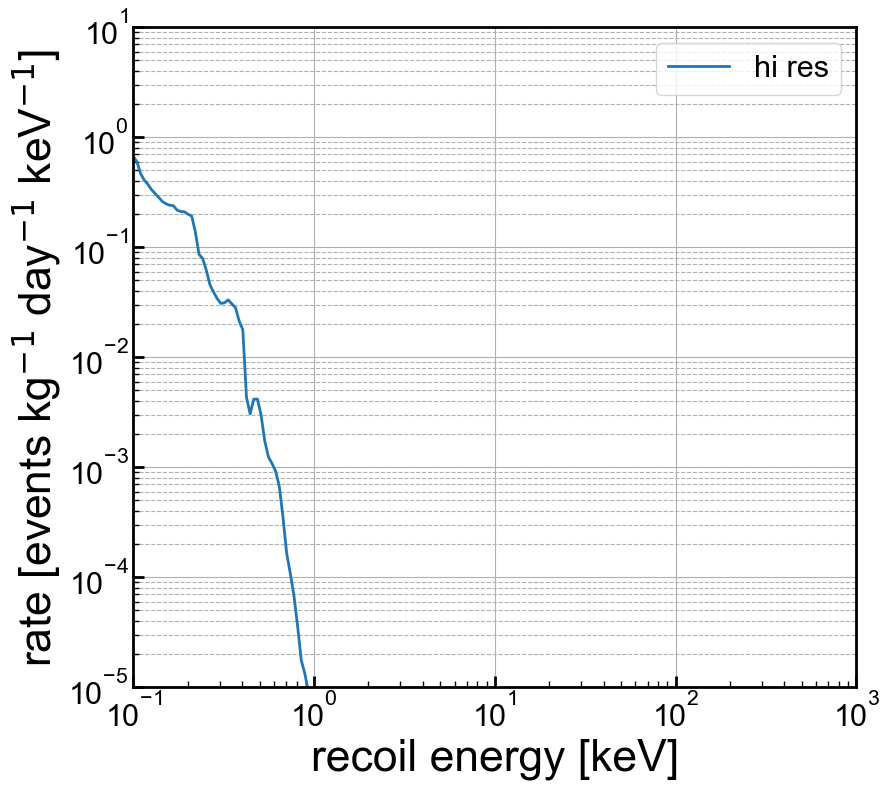

In [25]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er, 14*drde,label="hi res")



ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('../1-Paper_Figures/heflux.pdf')
#plt.savefig('../1-Paper_Figures/hist.pdf')
#plt.savefig('figures/first_recspec_library.png')
plt.show()

Converting to keV$_{\mathrm{nr}}$
---------------------------------